In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )

In [8]:
def show(index):
  plt.imshow(X_train[index])
  #plt.axis('off')
  plt.xlabel(labels[y_train[index]])
  plt.show()

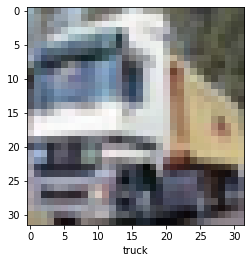

In [9]:
show(1)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
model = keras.Sequential([
                          keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
                          keras.layers.MaxPooling2D((2, 2)),

                          keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
                          keras.layers.MaxPooling2D((2, 2)),

                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [24]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
model.fit(X_train, y_train,
          batch_size = 32,
          epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7055 - accuracy: 0.3839
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1616 - accuracy: 0.5903
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0124 - accuracy: 0.6462
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9206 - accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8414 - accuracy: 0.7058
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7810 - accuracy: 0.7266
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7284 - accuracy: 0.7450
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6773 - accuracy: 0.7679
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6380 - accuracy: 0.7755
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.598

In [26]:
loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9362 - accuracy: 0.6931


In [27]:
test_accuracy

0.6930999755859375

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred_classes = [np.argmax(i) for i in y_pred]

In [30]:
y_pred_classes[: 5]

[3, 8, 8, 0, 6]

In [31]:
y_test[: 5]

array([3, 8, 8, 0, 6], dtype=uint8)

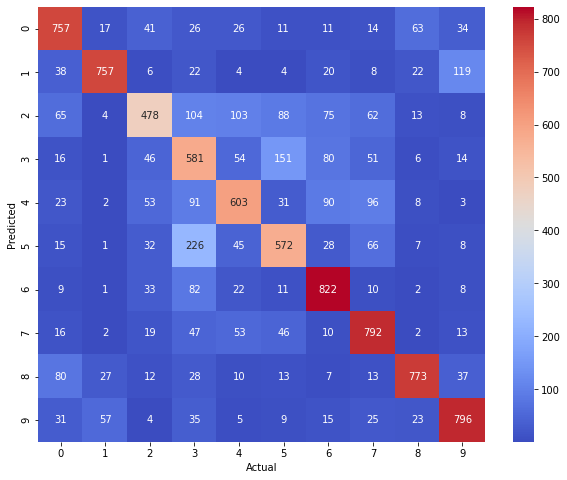

In [33]:
cm = tf.math.confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, cmap = 'coolwarm', annot = True, fmt = 'd')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()